In [1]:
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.facecolor'] = '#002B36'
pyplot.rcParams['axes.facecolor'] = 'black'


 # K-Means Clustering

 # 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells.

 Here's the original dataset for your reference:

 <https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

 ## This is a supervised learning dataset

 (Because it has **labels** - The "diagnosis" column.)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()


(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


 ## Now it's an unsupervised learning dataset

 (Because we've removed the diagnosis label) - Use this version.

In [3]:
train = df.drop('diagnosis', axis=1).drop('Unnamed: 32', axis=1).drop('id', axis=1)
# Dropping the 'id' column sharply increases the accuracy of the
# non-normalized 2-cluster K-Means result
# It doesn't really change anything else
# But is probably still good practice.
train.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
train.isna().sum()


radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
for col in train.columns:
	print(col, train[col].max())


radius_mean 28.11
texture_mean 39.28
perimeter_mean 188.5
area_mean 2501.0
smoothness_mean 0.1634
compactness_mean 0.3454
concavity_mean 0.4268
concave points_mean 0.2012
symmetry_mean 0.304
fractal_dimension_mean 0.09744
radius_se 2.873
texture_se 4.885
perimeter_se 21.98
area_se 542.2
smoothness_se 0.03113
compactness_se 0.1354
concavity_se 0.396
concave points_se 0.05279
symmetry_se 0.07895
fractal_dimension_se 0.02984
radius_worst 36.04
texture_worst 49.54
perimeter_worst 251.2
area_worst 4254.0
smoothness_worst 0.2226
compactness_worst 1.058
concavity_worst 1.252
concave points_worst 0.29100000000000004
symmetry_worst 0.6638
fractal_dimension_worst 0.2075


 ## Let's do it!

 - You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
 - You might want to use the elbow method to decide on the number of clusters to use.


In [6]:
# Perform K-Means Clustering on the Dataset
import numpy
import matplotlib.pyplot as pyplot

variances = []
stddevs = []
kmeans = []

for k in range(1, 11):
	print(f'Running KMeans(n_clusters={k})')
	kmeans.append(KMeans(n_clusters=k))
	kmeans[-1].fit(train)
	variances.append(kmeans[-1].inertia_/k)
	stddevs.append(variances[-1]**.5)


Running KMeans(n_clusters=1)
Running KMeans(n_clusters=2)
Running KMeans(n_clusters=3)
Running KMeans(n_clusters=4)
Running KMeans(n_clusters=5)
Running KMeans(n_clusters=6)
Running KMeans(n_clusters=7)
Running KMeans(n_clusters=8)
Running KMeans(n_clusters=9)
Running KMeans(n_clusters=10)


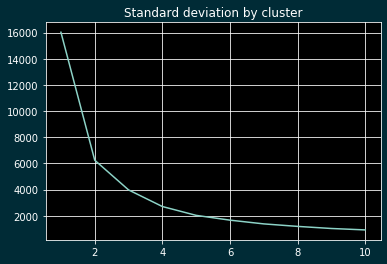

In [7]:

pyplot.plot(range(1, 11), stddevs)
pyplot.grid()
pyplot.title('Standard deviation by cluster')
pyplot.show()


In [8]:
kmeans[2].cluster_centers_
stddevs


[16021.149894879658,
 6242.719754974543,
 3972.262597143286,
 2703.078876576662,
 2026.8141316905642,
 1661.438213780509,
 1375.7927307868856,
 1184.6169665322632,
 1024.633258040503,
 915.768223597569]

 ## Check you work:

 This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true dianosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like:
 \begin{align}
 \frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
 \end{align}

In [9]:
#kmeans[1].labels_==1


In [10]:
len(df['diagnosis']=='B')

569

In [11]:
len(kmeans[1].labels_)

569

In [12]:
import pandas
pandas.Series(kmeans[1].labels_).value_counts()

0    438
1    131
dtype: int64

In [13]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [14]:
import scipy.stats as stats
result = pandas.DataFrame(numpy.transpose([df['diagnosis']=='B',kmeans[1].labels_==stats.mode(kmeans[1].labels_)[0][0]]), columns=['diagnosis', 'kmeans_2_clusters'])
# (result['diagnosis']==(kmeans[1].labels_==1)).value_counts()
result['correct'] = result['diagnosis']==result['kmeans_2_clusters']
result['correct'].value_counts()


True     486
False     83
Name: correct, dtype: int64

In [15]:
percent_correct = result['correct'].value_counts()[True]/len(result['correct'])*100
print(f'Got {percent_correct:5.4}% correct.')
naive_percent_correct = (result['diagnosis']==True).value_counts()[True]/len(result['diagnosis'])*100
print(f'Naive estimation (all diagnosis = \'B\') would get {naive_percent_correct:5.4}%')


Got 85.41% correct.
Naive estimation (all diagnosis = 'B') would get 62.74%


In [16]:

# Testing how good the data is if we just normalize it first
from sklearn.preprocessing import StandardScaler

target = df['diagnosis'].replace({'B':1,'M':0})
# target.value_counts()
scaler = StandardScaler()
processed = scaler.fit_transform(train,y=target)

kmeans=KMeans(n_clusters=2)
kmeans.fit(processed)


result['kmeans_normalized_2_clusters'] = kmeans.labels_==stats.mode(kmeans.labels_)[0][0]
result['normalized_correct'] = result['diagnosis']==result['kmeans_normalized_2_clusters']
result['normalized_correct'].value_counts()


True     515
False     54
Name: normalized_correct, dtype: int64

In [17]:
percent_correct = result['normalized_correct'].value_counts()[True]/len(result['normalized_correct'])*100
print(f'Got {percent_correct:5.4}% correct for 2 clusters on normalized data.')


Got 90.51% correct for 2 clusters on normalized data.


 # 2) Perform PCA on your dataset first and *then* use k-means clustering.

 - You need to standardize your data before PCA.
 - First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
 - Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

target = df['diagnosis'].replace({'B':1,'M':0})
target.value_counts()


1    357
0    212
Name: diagnosis, dtype: int64

In [19]:

scaler = StandardScaler()
processed = scaler.fit_transform(train,y=target)

pca = PCA()
pca.fit(processed)

print(f'eigenvectors: {pca.components_}')
print(f'eigenvalues: {pca.explained_variance_}')
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')
print(pca)

projected = pca.transform(processed)
print(f'projected: {projected}')


eigenvectors: [[ 2.18902444e-01  1.03724578e-01  2.27537293e-01  2.20994985e-01
   1.42589694e-01  2.39285354e-01  2.58400481e-01  2.60853758e-01
   1.38166959e-01  6.43633464e-02  2.05978776e-01  1.74280281e-02
   2.11325916e-01  2.02869635e-01  1.45314521e-02  1.70393451e-01
   1.53589790e-01  1.83417397e-01  4.24984216e-02  1.02568322e-01
   2.27996634e-01  1.04469325e-01  2.36639681e-01  2.24870533e-01
   1.27952561e-01  2.10095880e-01  2.28767533e-01  2.50885971e-01
   1.22904556e-01  1.31783943e-01]
 [-2.33857132e-01 -5.97060883e-02 -2.15181361e-01 -2.31076711e-01
   1.86113023e-01  1.51891610e-01  6.01653628e-02 -3.47675005e-02
   1.90348770e-01  3.66575471e-01 -1.05552152e-01  8.99796818e-02
  -8.94572342e-02 -1.52292628e-01  2.04430453e-01  2.32715896e-01
   1.97207283e-01  1.30321560e-01  1.83848000e-01  2.80092027e-01
  -2.19866379e-01 -4.54672983e-02 -1.99878428e-01 -2.19351858e-01
   1.72304352e-01  1.43593173e-01  9.79641143e-02 -8.25723507e-03
   1.41883349e-01  2.753394

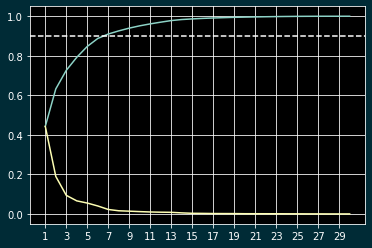

In [20]:
variance_sum = numpy.cumsum(pca.explained_variance_ratio_)
pyplot.plot(range(1,len(variance_sum)+1), variance_sum)
pyplot.plot(range(1,len(variance_sum)+1),  pca.explained_variance_ratio_)
pyplot.xticks(range(1,len(variance_sum)+1,2))
pyplot.grid()
pyplot.axhline(y=0.9,linestyle='--')
pyplot.show()


In [21]:
for i in range(len(variance_sum)):
	print(f'PC{i+1} explains {variance_sum[i]*100:5.4}% of variation')
	if variance_sum[i] > 0.9:
		print(f'Need PC{i+1}')
		break


PC1 explains 44.27% of variation
PC2 explains 63.24% of variation
PC3 explains 72.64% of variation
PC4 explains 79.24% of variation
PC5 explains 84.73% of variation
PC6 explains 88.76% of variation
PC7 explains 91.01% of variation
Need PC7


In [22]:
# PC1 clustering
import scipy.stats as stats
processed = scaler.fit_transform(train,y=target)
pc1 = PCA(1)
pc1.fit(processed)
projected_1 = pc1.transform(processed)
kmeans=KMeans(n_clusters=2)
kmeans.fit(projected_1)

#kmeans.labels_==stats.mode(kmeans.labels_)[0][0]


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:

result['pc1_cluster_1'] = kmeans.labels_==stats.mode(kmeans.labels_)[0][0]
result['pc1_correct'] = result['diagnosis']==result['pc1_cluster_1']
result['pc1_correct'].value_counts()


True     517
False     52
Name: pc1_correct, dtype: int64

In [24]:
percent_correct = result['pc1_correct'].value_counts()[True]/len(result['pc1_correct'])*100
print(f'Got {percent_correct:5.4}% correct for 2 clusters on PC1.')


Got 90.86% correct for 2 clusters on PC1.


In [25]:
# PC2 clustering
processed = scaler.fit_transform(train,y=target)
pc2 = PCA(2)
pc2.fit(processed)
projected_2 = pc2.transform(processed)
kmeans=KMeans(n_clusters=2)
kmeans.fit(projected_2)

#kmeans.labels_==stats.mode(kmeans.labels_)[0][0]


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:

result['pc2_cluster_1'] = kmeans.labels_==stats.mode(kmeans.labels_)[0][0]
result['pc2_correct'] = result['diagnosis']==result['pc2_cluster_1']
result['pc2_correct'].value_counts()


True     516
False     53
Name: pc2_correct, dtype: int64

In [27]:
percent_correct = result['pc2_correct'].value_counts()[True]/len(result['pc2_correct'])*100
print(f'Got {percent_correct:5.4}% correct for 2 clusters on PC2.')


Got 90.69% correct for 2 clusters on PC2.


In [28]:
kmeans.cluster_centers_


array([[-2.20247773, -0.02171612],
       [ 4.35883027,  0.04297744]])

In [29]:
projected_2.shape


(569, 2)

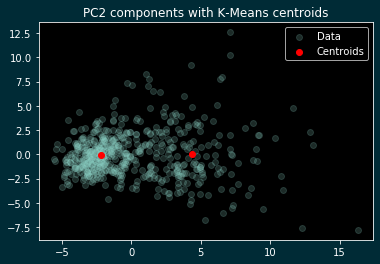

In [30]:
pyplot.scatter(projected_2[:,0],projected_2[:,1], alpha=0.2)
pyplot.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color='r')
pyplot.title('PC2 components with K-Means centroids')
pyplot.legend(['Data','Centroids'])
pyplot.show()


In [31]:
# Clustering on PC7
processed = scaler.fit_transform(train,y=target)
pc7 = PCA(7)
pc7.fit(processed)
projected_7 = pc7.transform(processed)
kmeans=KMeans(n_clusters=2)
kmeans.fit(projected_7)

#kmeans.labels_==stats.mode(kmeans.labels_)[0][0]


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [32]:

result['pc7_cluster_1'] = kmeans.labels_==stats.mode(kmeans.labels_)[0][0]
result['pc7_correct'] = result['diagnosis']==result['pc7_cluster_1']
result['pc7_correct'].value_counts()


True     518
False     51
Name: pc7_correct, dtype: int64

In [33]:
percent_correct = result['pc7_correct'].value_counts()[True]/len(result['pc7_correct'])*100
print(f'Got {percent_correct:5.4}% correct for 2 clusters on PC7.')


Got 91.04% correct for 2 clusters on PC7.


 ## Check your work:

 - Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
 - Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

 How do your accuracy scores when preprocessing the data with PCA compare to the accuracy when clustering on the raw data?

 # Stretch Goals:

 - Study for the Sprint Challenge
 - Work on your Data Storytelling Project
 - Practice your two-minute presentation for your Data Storytelling Project